In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import pandas.tseries
plt.style.use('fivethirtyeight')

In [146]:
# Load the data
mydata = pd.read_csv('Lab3_Diet.csv')

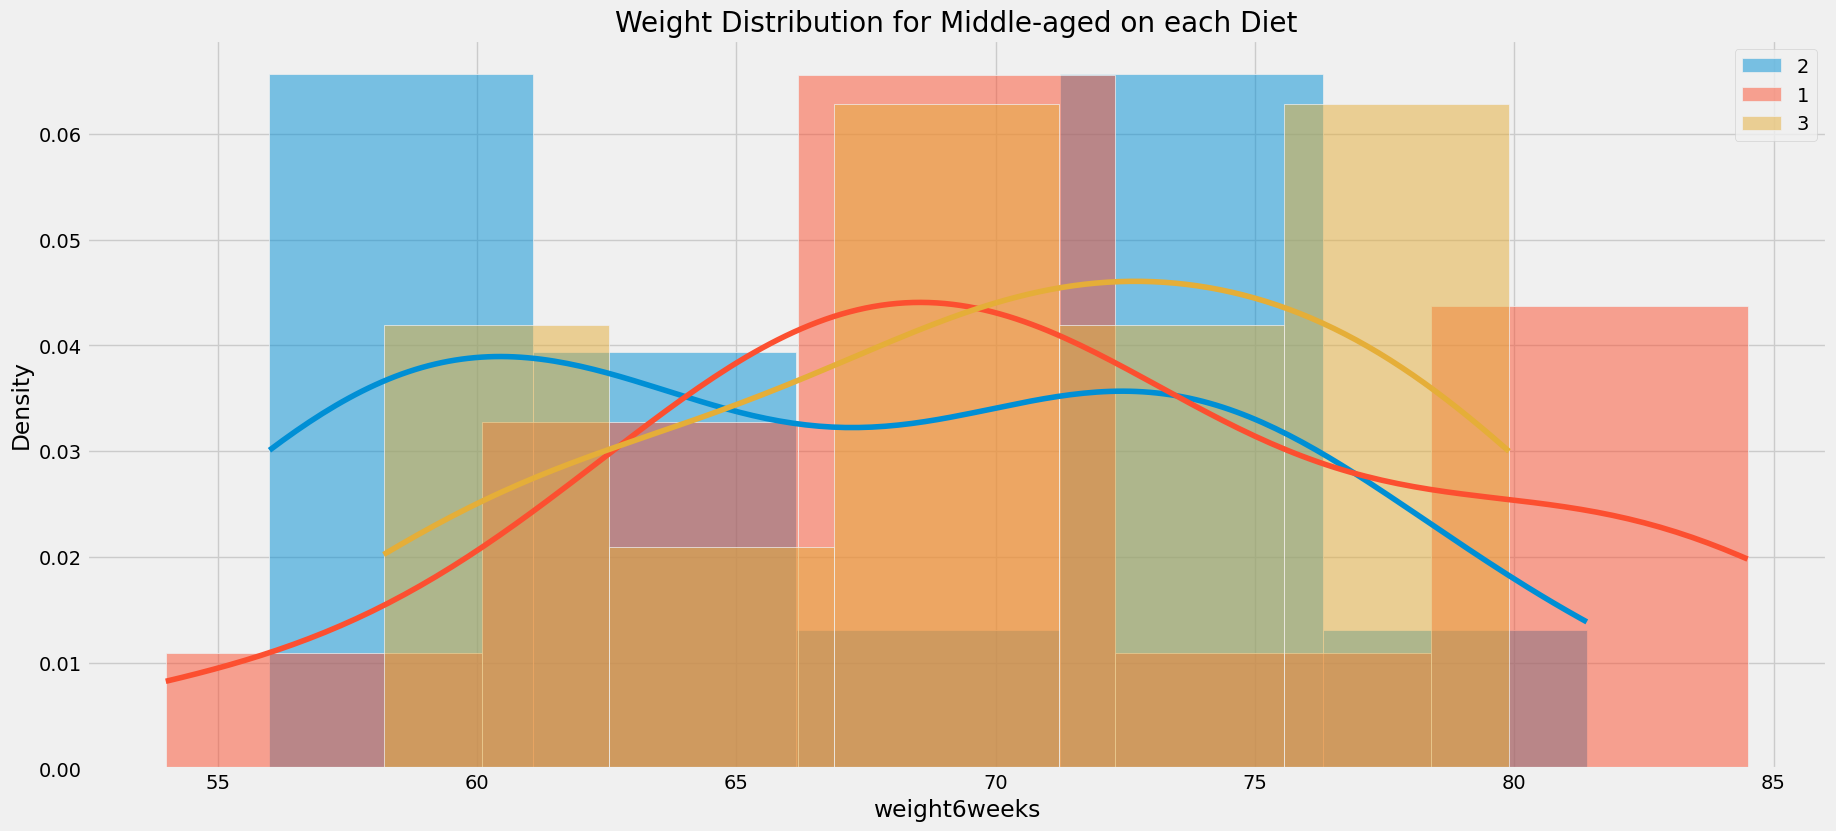

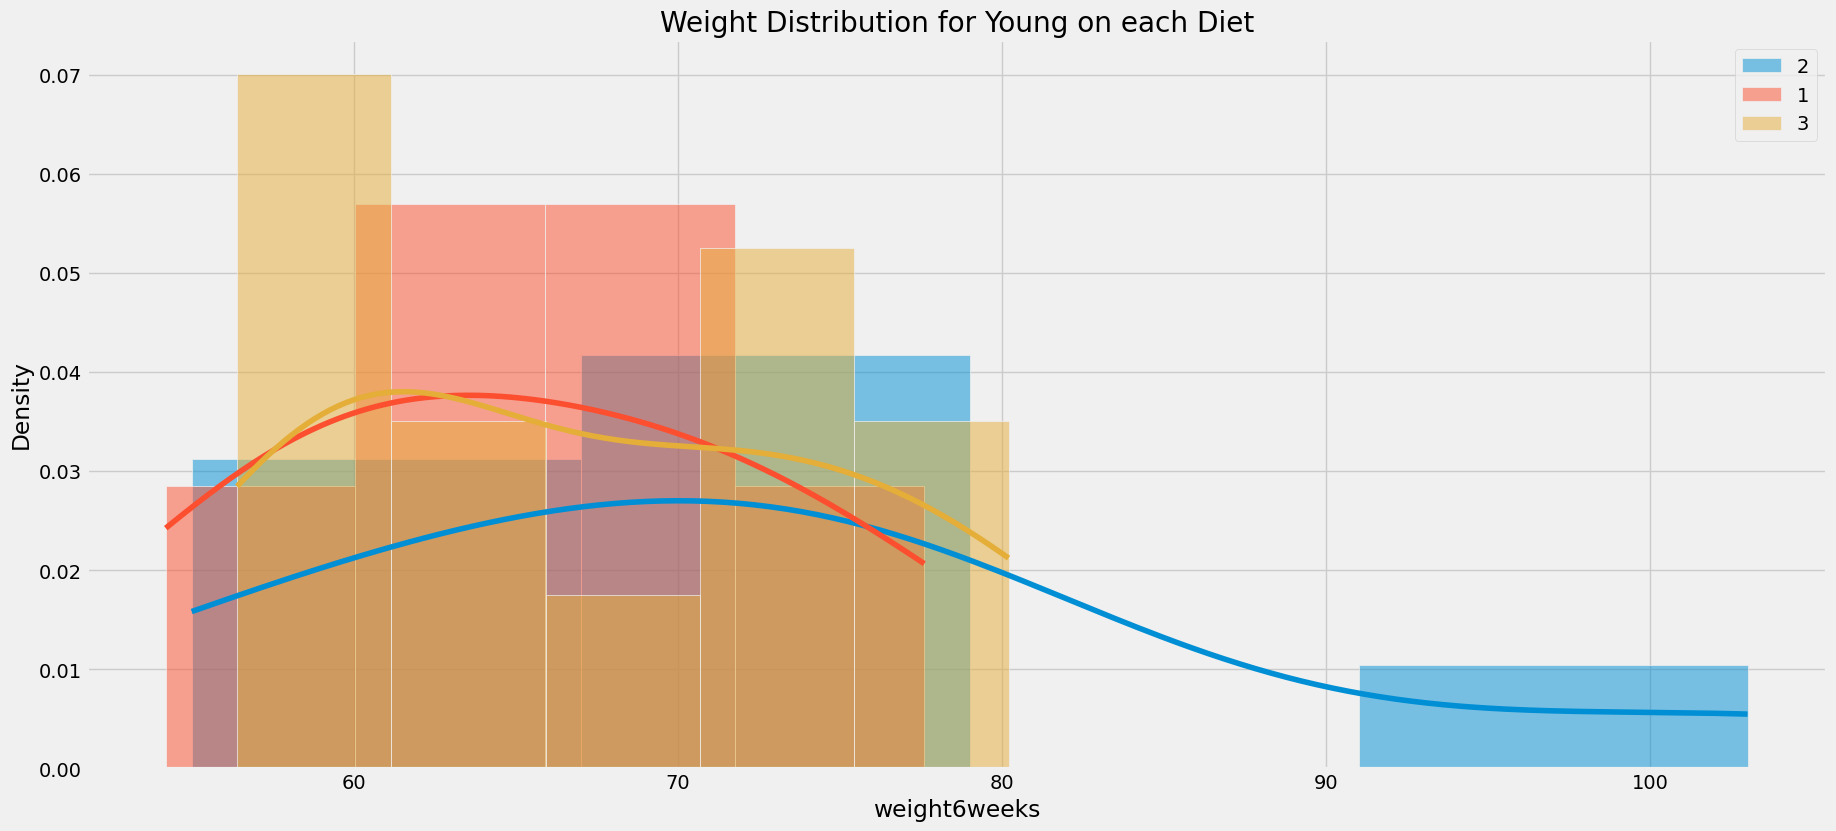

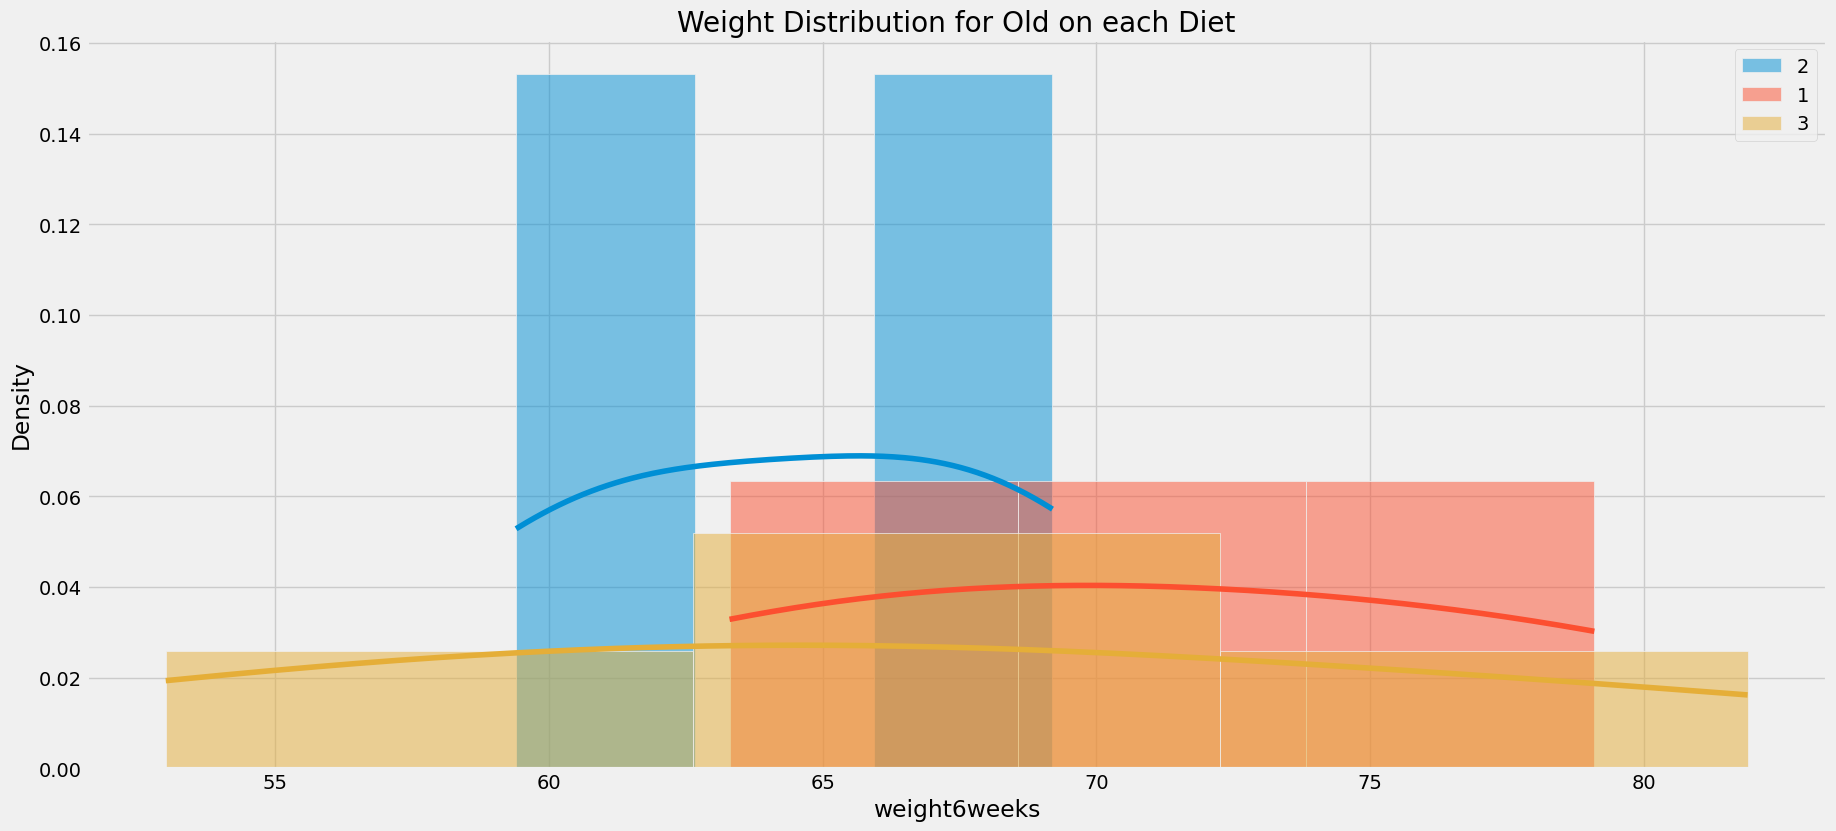

In [147]:
# Define age groups
def categorize_age(age):
    if age < 36:
        return 'Young'
    elif age < 51:
        return 'Middle-aged'
    else:
        return 'Old'

mydata['AgeGroup'] = mydata['Age'].apply(categorize_age)

# Visualize weight distribution for each diet within age groups
def show_distribution_by_age(df, age_group, column, group):
    f, ax = plt.subplots(figsize=(20, 9))
    plt.title(f'Weight Distribution for {age_group} on each {column}')
    for group_member in group:
        sns.histplot(df[df[column] == group_member].weight6weeks, label=f'{group_member}', kde=True, stat="density")
    plt.legend()
    plt.show()

# Unique diets and age groups
unique_diets = mydata.Diet.unique()
unique_age_groups = mydata.AgeGroup.unique()

# Visualize distributions
for age_group in unique_age_groups:
    if age_group != ' ':
        show_distribution_by_age(mydata[mydata.AgeGroup == age_group], age_group, 'Diet', unique_diets)

In [148]:
# Group by age group and diet
print("Statistical Summary by Age Group and Diet:")
print(mydata.groupby(['AgeGroup', 'Diet']).agg({
    'weight6weeks': ['mean', 'median', 'count', 'std']
}))

# Statistical summary by age group and diet

# print(mydata.groupby(['AgeGroup', 'Diet']).agg(
#     [np.mean, np.median, np.count_nonzero, np.std]).weight6weeks)

Statistical Summary by Age Group and Diet:
                 weight6weeks                        
                         mean median count        std
AgeGroup    Diet                                     
Middle-aged 1       70.966667  69.50    15   8.465617
            2       66.666667  64.00    15   8.091854
            3       70.245455  71.00    11   7.097938
Old         1       70.966667  70.50     3   7.910331
            2       64.450000  64.60     4   4.389001
            3       66.700000  65.95     4  12.072835
Young       1       65.400000  64.60     6   8.418076
            2       72.562500  72.60     8  14.620332
            3       67.458333  66.90    12   8.344782


In [149]:
for age_group in unique_age_groups:
    mymod = ols('weight6weeks ~ Diet', data=mydata[mydata.AgeGroup == age_group]).fit()
    aovtable = sm.stats.anova_lm(mymod, typ=2)
    print(f'ANOVA table for {age_group}')
    print('----------------------')
    print(aovtable)
    print()

ANOVA table for Middle-aged
----------------------
               sum_sq    df         F    PR(>F)
Diet         8.785714   1.0  0.133316  0.716991
Residual  2570.154286  39.0       NaN       NaN

ANOVA table for Young
----------------------
               sum_sq    df         F    PR(>F)
Diet         2.008551   1.0  0.017111  0.897017
Residual  2817.216065  24.0       NaN       NaN

ANOVA table for Old
----------------------
              sum_sq   df         F    PR(>F)
Diet       25.010957  1.0  0.336603  0.576032
Residual  668.736316  9.0       NaN       NaN

